In [4]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [5]:
data = open("datartl_00000001.bin", "rb").read()
(serial_no, cfreq, srate, tv_sec, tv_nsec, bufsize) = struct.unpack("@IIIIII", data[:24])
fulltime = tv_sec + (tv_nsec/1e9)

print ("Device serial number was", serial_no)
print ("Timestamp was", fulltime)
print ("Centre frequency was", cfreq)
print ("Sampling rate was", srate)
print ("Buffer size was", bufsize)

bindata = np.array(struct.unpack("B"*int(bufsize), data[24:])).astype(np.uint8)
bindata_complex = bindata[0::2] + bindata[1::2]*1j

Device serial number was 1
Timestamp was 1690510252.3771167
Centre frequency was 97700000
Sampling rate was 2000000
Buffer size was 8388608


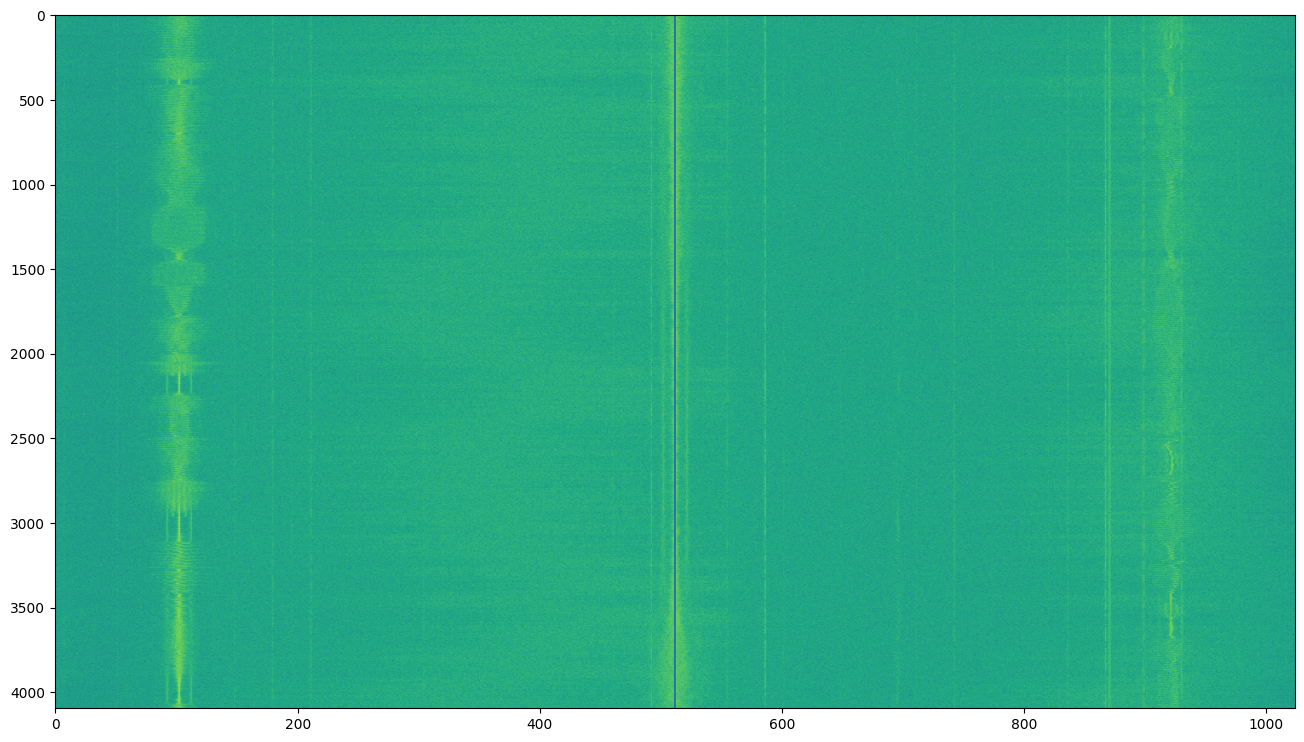

In [6]:
NFFT = 1024
Nsteps = int(bufsize/(2*NFFT))
wfall = np.zeros([NFFT, Nsteps], dtype=np.complex128)

for i in range(Nsteps):
    wfall[:,i] = np.fft.fftshift(np.fft.fft(bindata_complex[(i*NFFT): (i+1)*NFFT], NFFT))

plt.figure(figsize=(16,9))
plt.imshow(np.log(np.abs(wfall)).T, aspect='auto')
plt.axvline(NFFT/2)